In [57]:
import numpy as np
import json
import pandas as pd
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv('appointment_reminder_dataset.csv')

In [59]:
df.head()

,patient_id,appointment_id,age,gender,digital_literacy,employment_status,has_chronic_condition,distance_from_clinic_km,preferred_contact_method,past_appointments_count,...,cancelled_in_advance,cancellation_hours_advance,rescheduled,arrived_late,minutes_late,no_show,day_name,is_weekend,is_morning_appointment,age_group
0,1,APT0000100,54,F,Medium,Full-time,0,2.0,SMS,4,...,0,0.00000,0,0,NaN,1,Monday,0,0,46-60
1,2,APT0000200,65,M,High,Retired,1,24.0,SMS,3,...,0,NaN,0,0,0.0,0,Tuesday,0,0,60+
2,2,APT0000201,65,M,High,Retired,1,24.0,SMS,3,...,0,NaN,0,0,0.0,0,Wednesday,0,0,60+
3,3,APT0000300,28,F,High,Full-time,0,7.4,Email,8,...,1,39.62129,1,0,NaN,1,Friday,0,0,18-30
4,4,APT0000400,27,F,Medium,Full-time,1,7.1,SMS,6,...,0,NaN,0,0,0.0,0,Tuesday,0,1,18-30


In [60]:
df.shape

(15070, 39)

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.isnull().sum()

,0
patient_id,0
appointment_id,0
age,0
gender,0
digital_literacy,0
employment_status,0
has_chronic_condition,0
distance_from_clinic_km,0
preferred_contact_method,0
past_appointments_count,0


In [63]:
df.drop_duplicates()

,patient_id,appointment_id,age,gender,digital_literacy,employment_status,has_chronic_condition,distance_from_clinic_km,preferred_contact_method,past_appointments_count,...,cancelled_in_advance,cancellation_hours_advance,rescheduled,arrived_late,minutes_late,no_show,day_name,is_weekend,is_morning_appointment,age_group
0,1,APT0000100,54,F,Medium,Full-time,0,2.0,SMS,4,...,0,0.00000,0,0,NaN,1,Monday,0,0,46-60
1,2,APT0000200,65,M,High,Retired,1,24.0,SMS,3,...,0,NaN,0,0,0.0,0,Tuesday,0,0,60+
2,2,APT0000201,65,M,High,Retired,1,24.0,SMS,3,...,0,NaN,0,0,0.0,0,Wednesday,0,0,60+
3,3,APT0000300,28,F,High,Full-time,0,7.4,Email,8,...,1,39.62129,1,0,NaN,1,Friday,0,0,18-30
4,4,APT0000400,27,F,Medium,Full-time,1,7.1,SMS,6,...,0,NaN,0,0,0.0,0,Tuesday,0,1,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,9996,APT0999601,47,M,Low,Full-time,0,10.1,SMS,3,...,0,NaN,0,0,0.0,0,Tuesday,0,0,46-60
15066,9997,APT0999700,28,F,High,Full-time,0,4.7,App,5,...,0,NaN,0,0,0.0,0,Tuesday,0,0,18-30
15067,9998,APT0999800,42,F,Low,Full-time,0,2.2,Email,6,...,0,NaN,0,0,0.0,0,Wednesday,0,0,31-45
15068,9999,APT0999900,25,M,High,Part-time,1,1.7,Email,5,...,0,NaN,0,0,0.0,0,Thursday,0,0,18-30


In [64]:
df.shape


(15070, 39)

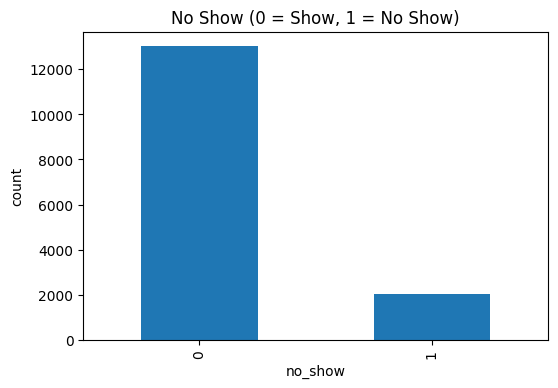

In [65]:
plt.figure(figsize = (6,4))
df['no_show'].value_counts().plot(kind ='bar')
plt.title('No Show (0 = Show, 1 = No Show)')
plt.ylabel('count')
plt.show()

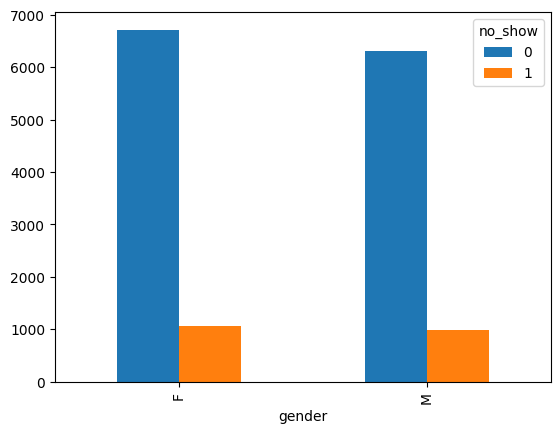

In [66]:
gender_noshow = pd.crosstab(df['gender'], df['no_show'])
gender_noshow.plot(kind='bar')
plt.show()
# both male and female show and no- show are almost equal


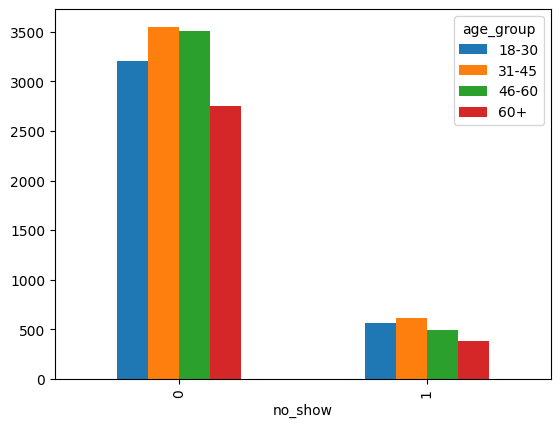

In [67]:
age_noshow = pd.crosstab(df['no_show'],df['age_group'])
age_noshow.plot(kind = 'bar')
plt.show()

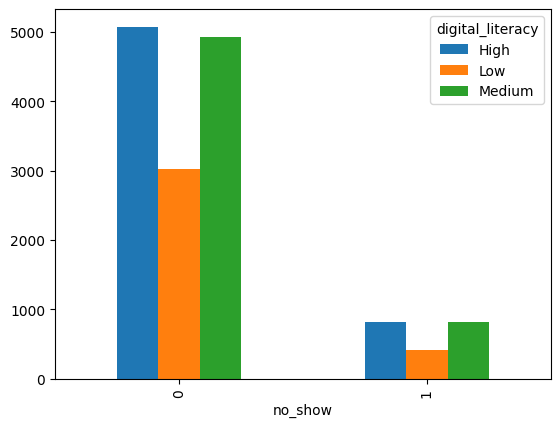

In [68]:
digital_literacy_no_show = pd.crosstab(df['no_show'],df['digital_literacy'])
digital_literacy_no_show.plot(kind ='bar')
plt.show()
#people with high digital literacy showed up more

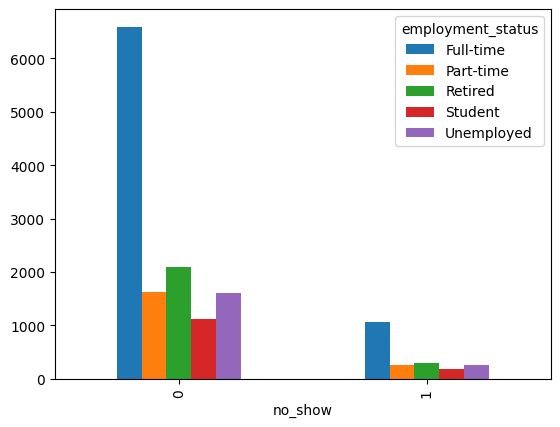

In [69]:
employment_status_no_show = pd.crosstab(df['no_show'],df['employment_status'])
employment_status_no_show.plot(kind ='bar')
plt.show()

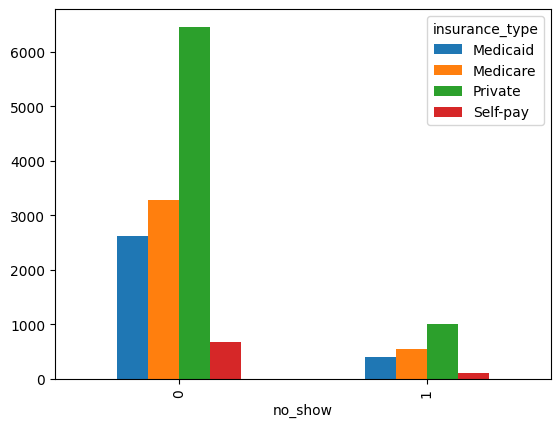

In [70]:
insurance_no_show = pd.crosstab(df['no_show'],df['insurance_type'])
insurance_no_show.plot(kind ='bar')
plt.show()

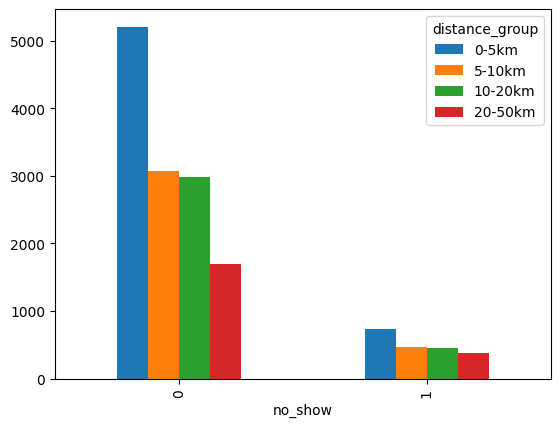

In [71]:

distance_bins = [0, 5, 10, 20, 50, 100]  # km
distance_labels = ['0-5km', '5-10km', '10-20km', '20-50km', '50+km']

df['distance_group'] = pd.cut(df['distance_from_clinic_km'],
                             bins=distance_bins,
                             labels=distance_labels)
distance_analysis = pd.crosstab(df['no_show'], df['distance_group'])
distance_analysis.plot(kind='bar')
plt.show()

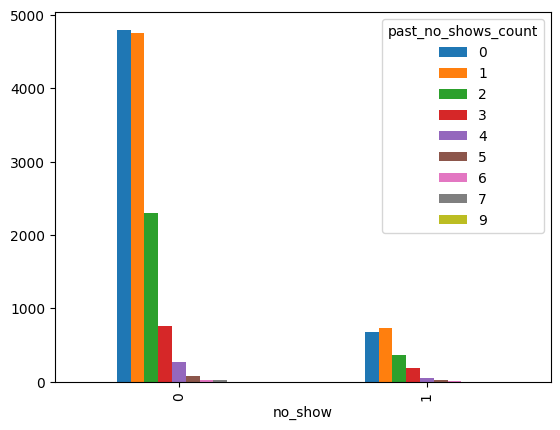

In [72]:
past_no_show_counts_analysis = pd.crosstab(df['no_show'],df['past_no_shows_count'])
past_no_show_counts_analysis.plot(kind='bar')
plt.show()

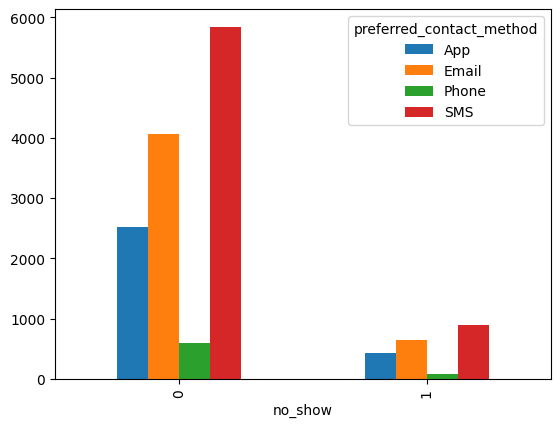

In [73]:
contact_analysis = pd.crosstab(df['no_show'], df['preferred_contact_method'])
contact_analysis.plot(kind='bar')
plt.show()

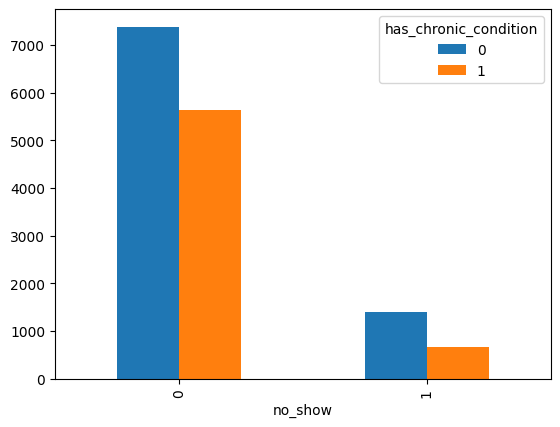

In [74]:
chronic_analysis = pd.crosstab(df['no_show'], df['has_chronic_condition'])
chronic_analysis.plot(kind='bar')
plt.show()

In [75]:
#Feature Engineering

digital_map = {'High': 2,'Medium': 1,'Low': 0}
df['digital_literacy'] = df['digital_literacy'].map(digital_map)

df['distance_group'] = pd.cut(df['distance_from_clinic_km'],
                             bins=[0,5,10,30,100],
                             labels=['0-5km','5-10km','10-30km','30+km'])

df['past_no_shows_count'] = (df['past_no_shows_count']/(df['past_appointments_count'] + 1))

df['is_repeat_offender'] = (df['past_no_shows_count']> 0).astype(int)

#one-hot encoding
employment_dummies = pd.get_dummies(df['employment_status'], prefix='emp')
contact_dummies = pd.get_dummies(df['preferred_contact_method'], prefix='contact')


In [76]:
df = pd.concat([df,employment_dummies,contact_dummies],axis = 1)
print(f"total features : {df.shape[1]}")
print(df.columns.tolist())

total features : 50
['patient_id', 'appointment_id', 'age', 'gender', 'digital_literacy', 'employment_status', 'has_chronic_condition', 'distance_from_clinic_km', 'preferred_contact_method', 'past_appointments_count', 'past_no_shows_count', 'historical_no_show_rate', 'appointment_specialty', 'appointment_type', 'day_of_week', 'appointment_hour', 'booking_lead_days', 'previous_cancellations', 'insurance_type', 'on_waitlist', 'season', 'weather_forecast', 'test_group', 'reminder_type', 'reminder_timing_hours_before', 'number_of_reminders_sent', 'reminder_opened', 'reminder_acknowledged', 'showed_up', 'cancelled_in_advance', 'cancellation_hours_advance', 'rescheduled', 'arrived_late', 'minutes_late', 'no_show', 'day_name', 'is_weekend', 'is_morning_appointment', 'age_group', 'distance_group', 'is_repeat_offender', 'emp_Full-time', 'emp_Part-time', 'emp_Retired', 'emp_Student', 'emp_Unemployed', 'contact_App', 'contact_Email', 'contact_Phone', 'contact_SMS']


In [77]:
# Check new employment columns
print("Employment columns:")
print([col for col in df.columns if 'emp_' in col])

# Check new contact columns
print("\nContact columns:")
print([col for col in df.columns if 'contact_' in col])

# Check your engineered features
print("\nYour engineered features:")
print(['digital_literacy', 'distance_group', 'past_no_show_rate', 'is_repeat_offender'])

Employment columns:
['emp_Full-time', 'emp_Part-time', 'emp_Retired', 'emp_Student', 'emp_Unemployed']

Contact columns:
['preferred_contact_method', 'contact_App', 'contact_Email', 'contact_Phone', 'contact_SMS']

Your engineered features:
['digital_literacy', 'distance_group', 'past_no_show_rate', 'is_repeat_offender']


In [78]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
  df[col] = le.fit_transform(df[col].astype(str))

In [79]:
X = df.drop('no_show',axis = 1)
y = df['no_show']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [80]:
model = xgb.XGBClassifier(random_state = 42, enable_categorical=True)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 1.0000


In [82]:
print(f"training samples:{len(X_train)}")
print(f"test samples:{len(X_test)}")
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
print("\nClassification Matrix:")
print(classification_report(y_test,y_pred))
print(f"\nUnique classes in y_test:{np.unique(y_test)}")
print(f"Class distribution in y_test:{np.bincount(y_test)}")


training samples:12056
test samples:3014

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2619
           1       1.00      1.00      1.00       395

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014


Classification Matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2619
           1       1.00      1.00      1.00       395

    accuracy                           1.00      3014
   macro avg       1.00      1.00      1.00      3014
weighted avg       1.00      1.00      1.00      3014


Unique classes in y_test:[0 1]
Class distribution in y_test:[2619  395]


In [83]:
def create_reminder_strategy_dataset(df,n_patients = 5000):
  """
  Create a stimulated dataset for reminder strategy A/B testing
  """
  np.random.seed(42)

  strategies = ['SMS_24h','SMS_48h','Email_24h','Phone_24h','App_24h','Multi-Channel']

  test_data = []

  for i in range (n_patients):
    strategy = random.choice(strategies)
    patient_profile = df.sample(1).iloc[0]
    base_no_show_prob = 0.15

    if patient_profile['digital_literacy'] == 0:
      base_no_show_prob += 0.05
    elif patient_profile['digital_literacy'] == 2:
      base_no_show_prob += 0.03

    if patient_profile['past_no_shows_count'] > 0:
      base_no_show_prob += 0.08

    if patient_profile['distance_from_clinic_km'] > 20:
      base_no_show_prob += 0.04

    if patient_profile['age'] > 60:
      base_no_show_prob += 0.02

    strategy_effectiveness = {
        'SMS_24h': 0.80,
        'SMS_48h': 0.85,
        'Email_24h': 0.75,
        'Phone_24h': 0.70,
        'App_24h': 0.78,
        'Multi-Channel': 0.65
    }
    final_no_show_prob = base_no_show_prob * strategy_effectiveness[strategy]
    final_no_show_prob = max(0.02,min(0.98,final_no_show_prob))

    no_show = np.random.binomial(1,final_no_show_prob)
    test_data.append({'patient_id':f"TEST_{i+1:05d}",
                      'strategy':strategy,
                      'age':patient_profile['age'],
                      'gender':patient_profile['gender'],
                      'distance_from_clinic':patient_profile['distance_from_clinic_km'],
                      'digital_literacy':patient_profile['digital_literacy'],
                      'employment_status':patient_profile['employment_status'],
                      'has_chronic_condition':patient_profile['has_chronic_condition'],
                      'base_no_show_prob':base_no_show_prob,
                      'final_no_show_prob':final_no_show_prob,
                      'no_show':no_show,
                      'past_no_shows_count':patient_profile['past_no_shows_count'],
                      'attended':1-no_show})
  return pd.DataFrame(test_data)

print("Creating A/B test dataset...")
ab_test_df = create_reminder_strategy_dataset(df, n_patients=3000)
print(f"Created dataset with {len(ab_test_df)} simulated appointments")
print(f"Strategies: {ab_test_df['strategy'].unique()}")

Creating A/B test dataset...
Created dataset with 3000 simulated appointments
Strategies: ['App_24h' 'Email_24h' 'Multi-Channel' 'SMS_24h' 'Phone_24h' 'SMS_48h']


In [84]:
def analyze_ab_test_results(ab_test_df):
  """Comprehensive analysis of the A/B test"""
  print("="*60)
  print("A/B Test Results Analysis: Reminder Strategies")
  print("="*60)

  strategy_results = ab_test_df.groupby('strategy').agg({
      'no_show':['count','mean','std'],
      'attended':['mean'],
      'final_no_show_prob':['mean'],
      'base_no_show_prob':['mean']
  }).round(4)

  strategy_results.columns = ['appointments','no_show_rate','no_show_std','attendance_rate','avg_base_prob','avg_final_prob']
  strategy_results['improvement'] = (strategy_results['avg_base_prob'] - strategy_results['no_show_rate'])
  print("\n Strategy Results:")
  print(strategy_results.sort_values('no_show_rate'))
  return strategy_results

results = analyze_ab_test_results(ab_test_df)

A/B Test Results Analysis: Reminder Strategies

 Strategy Results:
               appointments  no_show_rate  no_show_std  attendance_rate  \
strategy                                                                  
Phone_24h               508        0.1457       0.3531           0.8543   
Multi-Channel           459        0.1590       0.3661           0.8410   
SMS_24h                 500        0.1720       0.3778           0.8280   
Email_24h               494        0.1781       0.3830           0.8219   
SMS_48h                 508        0.1811       0.3855           0.8189   
App_24h                 531        0.1940       0.3958           0.8060   

               avg_base_prob  avg_final_prob  improvement  
strategy                                                   
Phone_24h             0.1620          0.2314       0.0163  
Multi-Channel         0.1537          0.2364      -0.0053  
SMS_24h               0.1895          0.2368       0.0175  
Email_24h             0.1752    

In [85]:
def statistical_significance_testing(ab_test_df, control_group='SMS_24h'):
  """Test statistical significance between strategies and a control group."""
  print("=" * 60)
  print(f"Statistical Significance Testing (vs Control: {control_group})")
  print("=" * 60)

  control_data = ab_test_df[ab_test_df['strategy'] == control_group]['no_show']
  control_rate = control_data.mean()
  n_control = len(control_data)

  strategies = [s for s in ab_test_df['strategy'].unique() if s != control_group]
  significance_results = []

  for strategy in strategies:
    treatment_data = ab_test_df[ab_test_df['strategy'] == strategy]['no_show']
    treatment_rate = treatment_data.mean()
    n_treatment = len(treatment_data)

    # T-test for difference in means
    t_stat, p_value_ttest = stats.ttest_ind(control_data, treatment_data)

    # Chi-squared test for proportions
    # Create a contingency table for control vs. current treatment group
    contingency_data = ab_test_df[ab_test_df['strategy'].isin([control_group, strategy])]
    contingency_table = pd.crosstab(contingency_data['strategy'], contingency_data['no_show'])
    chi2, p_value_chisq, _, _ = stats.chi2_contingency(contingency_table)

    # Confidence Interval for difference in proportions
    if n_control > 0 and n_treatment > 0:
        se = np.sqrt(control_rate * (1 - control_rate) / n_control + treatment_rate * (1 - treatment_rate) / n_treatment)
        margin_error = 1.96 * se # 95% confidence interval
        ci_lower = (treatment_rate - control_rate) - margin_error
        ci_upper = (treatment_rate - control_rate) + margin_error
    else:
        ci_lower, ci_upper = np.nan, np.nan

    significance_results.append({
        'strategy': strategy,
        'treatment_no_show_rate': treatment_rate,
        'control_no_show_rate': control_rate,
        'difference': treatment_rate - control_rate,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'p_value_ttest': p_value_ttest,
        'p_value_chisq': p_value_chisq,
        'significant_ttest': p_value_ttest < 0.05,
        'significant_chisq': p_value_chisq < 0.05
    })

  significance_df = pd.DataFrame(significance_results)
  print(significance_df.round(4))
  return significance_df

stats_result = statistical_significance_testing(ab_test_df)

Statistical Significance Testing (vs Control: SMS_24h)
        strategy  treatment_no_show_rate  control_no_show_rate  difference  \
0        App_24h                  0.1940                 0.172      0.0220   
1      Email_24h                  0.1781                 0.172      0.0061   
2  Multi-Channel                  0.1590                 0.172     -0.0130   
3      Phone_24h                  0.1457                 0.172     -0.0263   
4        SMS_48h                  0.1811                 0.172      0.0091   

   ci_lower  ci_upper  p_value_ttest  p_value_chisq  significant_ttest  \
0   -0.0252    0.0691         0.3626         0.4061              False   
1   -0.0411    0.0534         0.7993         0.8641              False   
2   -0.0600    0.0341         0.5903         0.6512              False   
3   -0.0714    0.0188         0.2531         0.2902              False   
4   -0.0380    0.0562         0.7051         0.7670              False   

   significant_chisq  
0       

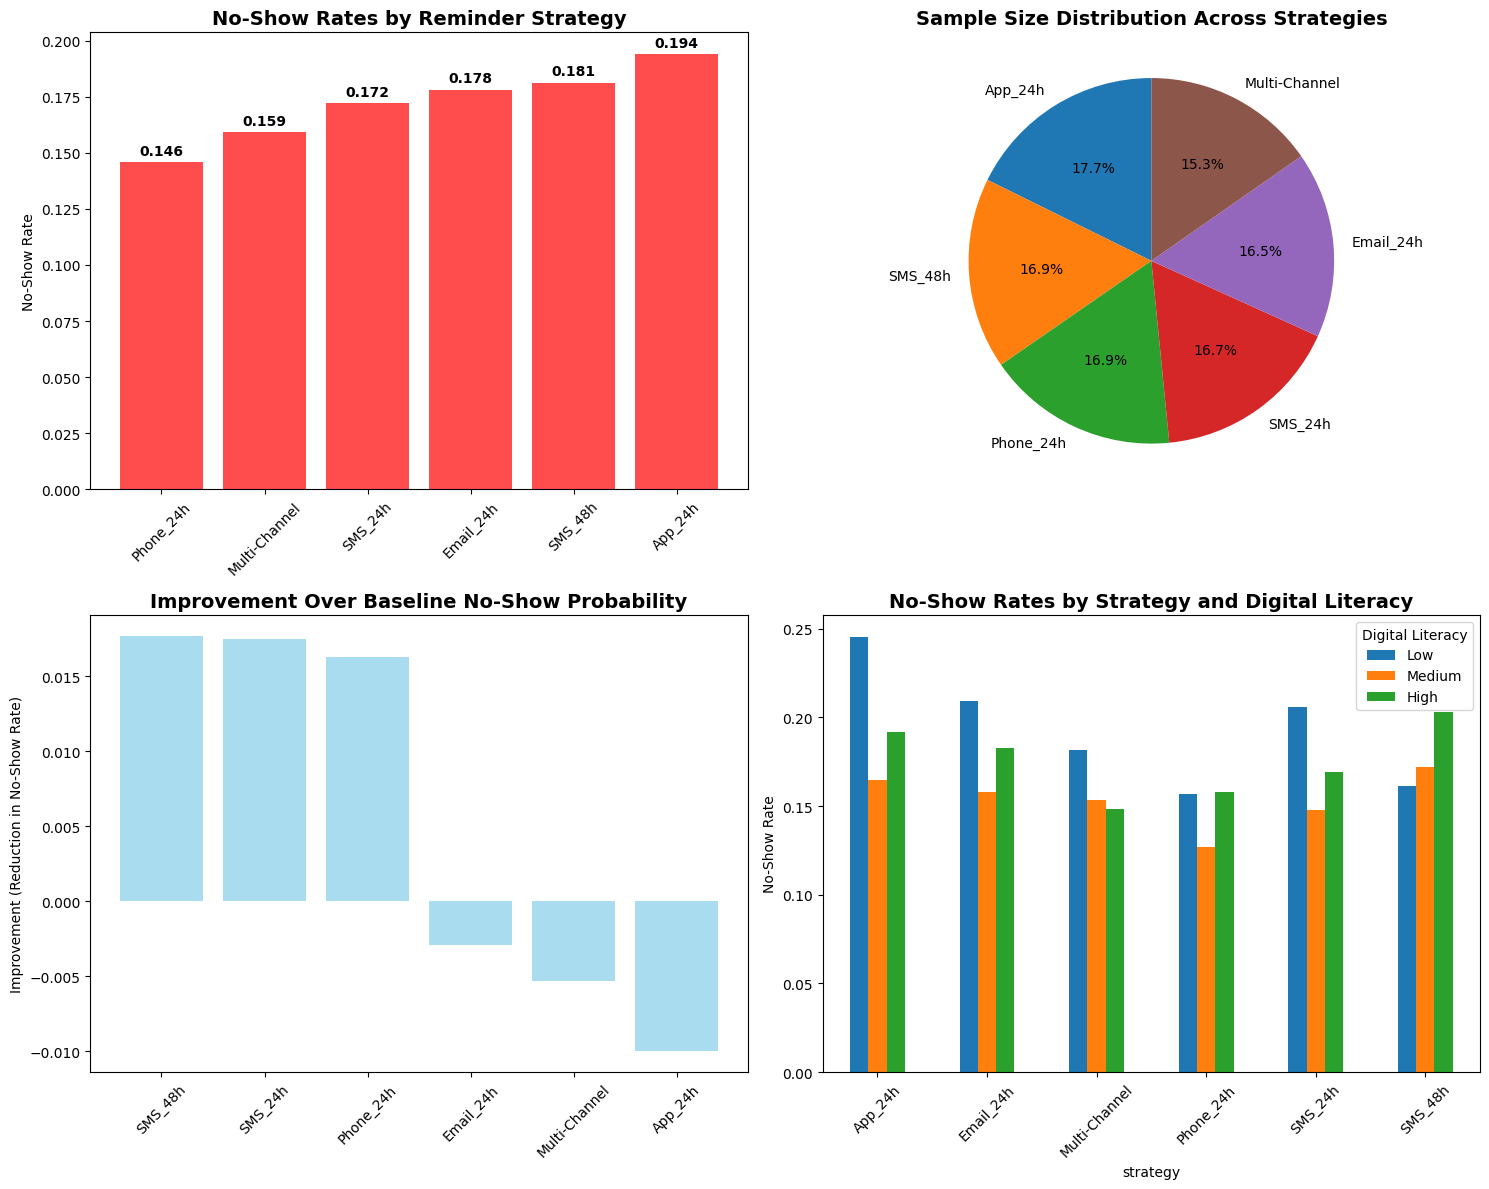

In [86]:
def visualise_ab_test_results(ab_test_df,results):
  """
  Create comprehensive visualization for A/B test result
  """
  fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: No-show rates by strategy
  plt.subplot(2, 2, 1)
  strategy_rates = ab_test_df.groupby('strategy')['no_show'].mean().sort_values()
  colors = ['green' if rate < 0.1 else 'orange' if rate < 0.12 else 'red' for rate in strategy_rates]
  bars = plt.bar(strategy_rates.index, strategy_rates.values, color=colors, alpha=0.7)
  plt.title('No-Show Rates by Reminder Strategy', fontsize=14, fontweight='bold')
  plt.ylabel('No-Show Rate')
  plt.xticks(rotation=45)

    # Add value labels on bars
  for bar, rate in zip(bars, strategy_rates.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
                  f'{rate:.3f}', ha='center', va='bottom', fontweight='bold')

    # Plot 2: Sample sizes
  plt.subplot(2, 2, 2)
  sample_sizes = ab_test_df['strategy'].value_counts()
  plt.pie(sample_sizes.values, labels=sample_sizes.index, autopct='%1.1f%%', startangle=90)
  plt.title('Sample Size Distribution Across Strategies', fontsize=14, fontweight='bold')

    # Plot 3: Improvement over baseline
  plt.subplot(2, 2, 3)
  improvement = results['improvement'].sort_values(ascending=False)
  plt.bar(improvement.index, improvement.values, color='skyblue', alpha=0.7)
  plt.title('Improvement Over Baseline No-Show Probability', fontsize=14, fontweight='bold')
  plt.ylabel('Improvement (Reduction in No-Show Rate)')
  plt.xticks(rotation=45)

    # Plot 4: Strategy effectiveness by digital literacy
  plt.subplot(2, 2, 4)
  digital_literacy_effect = pd.crosstab(
  ab_test_df['strategy'],
  ab_test_df['digital_literacy'],
  values=ab_test_df['no_show'],
  aggfunc='mean'
      )
  digital_literacy_effect.plot(kind='bar', ax=plt.gca())
  plt.title('No-Show Rates by Strategy and Digital Literacy', fontsize=14, fontweight='bold')
  plt.ylabel('No-Show Rate')
  plt.legend(['Low', 'Medium', 'High'], title='Digital Literacy')
  plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

# Create visualizations
visualise_ab_test_results(ab_test_df, results)

In [87]:
def cost_benefit_analysis(ab_test_df, results):
  """
  Analyze cost vs benefit of different strategies
  """
  print ("\n" +"=" * 60)
  print ("Cost-benefit analysis")
  print ("="*60)
  cost_per_appointment_value = 150
  strategy_costs_map = {'SMS_24h':0.10,'SMS_48h':0.15,'Email_24h':0.05,'Phone_24h':2.50,'App_24h':0.08,'Multi-Channel':0.35} # Corrected keys to match ab_test_df 'strategy' names
  cb_result = []
  for strategy in ab_test_df['strategy'].unique():
    strategy_data = ab_test_df[ab_test_df['strategy'] == strategy]
    n_appointments = len(strategy_data)
    no_show_rate = strategy_data['no_show'].mean()
    attendance_rate = 1 - no_show_rate # Corrected: defined attendance_rate

    #calculate financial impact
    lost_revenue = cost_per_appointment_value * no_show_rate * n_appointments
    current_strategy_cost = strategy_costs_map.get(strategy, 0)
    reminder_cost = n_appointments * current_strategy_cost
    net_revenue = (n_appointments * attendance_rate * cost_per_appointment_value) - reminder_cost
    cost_per_attended_calc = reminder_cost / (n_appointments * attendance_rate) if (n_appointments * attendance_rate) > 0 else np.nan

    cb_result.append({
        'strategy':strategy,
        'appointments':n_appointments,
        'no_show_rate':no_show_rate,
        'attendance_rate':attendance_rate,
        'lost_revenue':lost_revenue,
        'roi':(net_revenue - reminder_cost) / reminder_cost if reminder_cost > 0 else float('inf'),
        'reminder_cost':reminder_cost,
        'net_revenue':net_revenue,
        'cost_per_attended':cost_per_attended_calc
    })

  cb_df = pd.DataFrame(cb_result)
  cb_df = cb_df.sort_values('net_revenue',ascending = False) # Corrected false to False
  return cb_df

# Call the function and store its return value
cost_benefit_df = cost_benefit_analysis(ab_test_df,results)
# Print the returned DataFrame
print(cost_benefit_df.round(2))


Cost-benefit analysis
        strategy  appointments  no_show_rate  attendance_rate  lost_revenue  \
0        App_24h           531          0.19             0.81       15450.0   
4      Phone_24h           508          0.15             0.85       11100.0   
5        SMS_48h           508          0.18             0.82       13800.0   
3        SMS_24h           500          0.17             0.83       12900.0   
1      Email_24h           494          0.18             0.82       13200.0   
2  Multi-Channel           459          0.16             0.84       10950.0   

       roi  reminder_cost  net_revenue  cost_per_attended  
0  1509.30          42.48     64157.52               0.10  
4    49.26        1270.00     63830.00               2.93  
5   816.90          76.20     62323.80               0.18  
3  1240.00          50.00     62050.00               0.12  
1  2463.59          24.70     60875.30               0.06  
2   358.41         160.65     57739.35               0.42  


In [88]:
def generate_recommendations(ab_test_df, stats_results, cost_benefit_df):
    """
    Generate data-driven recommendations based on A/B test results
    """
    print("\n" + "=" * 60)
    print("DATA-DRIVEN RECOMMENDATIONS")
    print("=" * 60)

    # Find best performing strategies
    best_overall = cost_benefit_df.iloc[0]
    best_low_cost = cost_benefit_df[cost_benefit_df['cost_per_attended'] < 0.20].iloc[0]

    # Significant improvements
    significant_improvements = stats_results[stats_results['significant_chisq'] &
                                           (stats_results['difference'] < 0)]

    print(" TOP RECOMMENDATIONS:")
    print(f"1. BEST OVERALL STRATEGY: {best_overall['strategy']}")
    print(f"   • No-show rate: {best_overall['no_show_rate']:.3f}")
    print(f"   • Net revenue: ${best_overall['net_revenue']:,.2f}")
    print(f"   • Cost per attended appointment: ${best_overall['cost_per_attended']:.2f}")

    print(f"\n2. MOST COST-EFFECTIVE: {best_low_cost['strategy']}")
    print(f"   • Cost per attended: ${best_low_cost['cost_per_attended']:.2f}")
    print(f"   • Good balance of cost and effectiveness")

    if len(significant_improvements) > 0:
        print(f"\n3. STATISTICALLY SIGNIFICANT IMPROVEMENTS:")
        for _, strategy in significant_improvements.iterrows():
            print(f"   • {strategy['strategy']}: {strategy['difference']:.4f} reduction (p={strategy['p_value_chisq']:.4f})")

    # Segment-specific recommendations
    print(f"\n4. SEGMENT-SPECIFIC RECOMMENDATIONS:")

    # Digital literacy segments
    for dl_level, dl_name in [(0, 'Low'), (1, 'Medium'), (2, 'High')]:
        dl_data = ab_test_df[ab_test_df['digital_literacy'] == dl_level]
        best_dl_strategy = dl_data.groupby('strategy')['no_show'].mean().idxmin()
        best_dl_rate = dl_data.groupby('strategy')['no_show'].mean().min()
        print(f"   • {dl_name} Digital Literacy: {best_dl_strategy} (no-show: {best_dl_rate:.3f})")

    # Age-based recommendations
    age_segments = [
        (0, 30, 'Young (18-30)'),
        (31, 45, 'Middle (31-45)'),
        (46, 60, 'Older (46-60)'),
        (61, 100, 'Senior (60+)')
    ]

    for min_age, max_age, segment_name in age_segments:
        age_data = ab_test_df[(ab_test_df['age'] >= min_age) & (ab_test_df['age'] <= max_age)]
        if len(age_data) > 0:
            best_age_strategy = age_data.groupby('strategy')['no_show'].mean().idxmin()
            best_age_rate = age_data.groupby('strategy')['no_show'].mean().min()
            print(f"   • {segment_name}: {best_age_strategy} (no-show: {best_age_rate:.3f})")

# Generate final recommendations
generate_recommendations(ab_test_df, stats_result, cost_benefit_df)


DATA-DRIVEN RECOMMENDATIONS
 TOP RECOMMENDATIONS:
1. BEST OVERALL STRATEGY: App_24h
   • No-show rate: 0.194
   • Net revenue: $64,157.52
   • Cost per attended appointment: $0.10

2. MOST COST-EFFECTIVE: App_24h
   • Cost per attended: $0.10
   • Good balance of cost and effectiveness

4. SEGMENT-SPECIFIC RECOMMENDATIONS:
   • Low Digital Literacy: Phone_24h (no-show: 0.157)
   • Medium Digital Literacy: Phone_24h (no-show: 0.127)
   • High Digital Literacy: Multi-Channel (no-show: 0.149)
   • Young (18-30): SMS_24h (no-show: 0.152)
   • Middle (31-45): Email_24h (no-show: 0.120)
   • Older (46-60): Phone_24h (no-show: 0.110)
   • Senior (60+): Phone_24h (no-show: 0.139)


In [89]:
def create_implementation_plan(cost_benefit_df, rollout_percentage=0.3):
    """
    Create a phased implementation plan for the winning strategy
    """
    best_strategy = cost_benefit_df.iloc[0]['strategy']
    best_attendance_rate = 1 - cost_benefit_df.iloc[0]['no_show_rate']

    print(f"\n{'=' * 60}")
    print(f"IMPLEMENTATION PLAN: {best_strategy}")
    print(f"{'=' * 60}")

    # Calculate expected impact
    total_monthly_appointments = 5000  # Adjust based on your volume
    phased_appointments = total_monthly_appointments * rollout_percentage
    current_attendance_rate = 0.85  # Adjust based on your baseline
    expected_improvement = best_attendance_rate - current_attendance_rate

    additional_attended = phased_appointments * expected_improvement
    additional_revenue = additional_attended * 150  # $150 per appointment

    print(f"PHASED ROLLOUT ({rollout_percentage*100}% of appointments):")
    print(f"• Monthly appointments affected: {phased_appointments:,.0f}")
    print(f"• Expected additional attended appointments: {additional_attended:,.0f}")
    print(f"• Estimated additional monthly revenue: ${additional_revenue:,.2f}")
    print(f"• Implementation cost: ${phased_appointments * cost_benefit_df.iloc[0]['cost_per_attended']:,.2f}")
    print(f"• Net monthly benefit: ${additional_revenue - (phased_appointments * cost_benefit_df.iloc[0]['cost_per_attended']):,.2f}")

    print(f"\nNEXT STEPS:")
    print(f"1. Technical setup for {best_strategy} reminders")
    print(f"2. Staff training and process updates")
    print(f"3. Patient communication about new reminder system")
    print(f"4. Monitor results for 30 days")
    print(f"5. Full rollout if targets are met")

# Create implementation plan
create_implementation_plan(cost_benefit_df)


IMPLEMENTATION PLAN: App_24h
PHASED ROLLOUT (30.0% of appointments):
• Monthly appointments affected: 1,500
• Expected additional attended appointments: -66
• Estimated additional monthly revenue: $-9,894.07
• Implementation cost: $148.88
• Net monthly benefit: $-10,042.95

NEXT STEPS:
1. Technical setup for App_24h reminders
2. Staff training and process updates
3. Patient communication about new reminder system
4. Monitor results for 30 days
5. Full rollout if targets are met
